# IDS PROJECT G5-KAGGLE-STUDENT-PERFORMANCE

This project's goal is to train a model to predict students' exam results based on different factors and to find what factors affect student performance the most.

## Preparing the dataset

### Importing tools and reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = pd.read_csv("../data/StudentPerformanceFactors.csv")
print("The dataset contains", len(data), "rows and", len(data.columns), "columns")

The dataset contains 6607 rows and 20 columns


### Finding columns with NaN values

In [3]:
print("There are", data.isna().sum().sum(), "NaN values in our dataset, in columns:")
nanColumns = data.columns[data.isnull().any()]
for col in nanColumns:
    print(col)

There are 235 NaN values in our dataset, in columns:
Teacher_Quality
Parental_Education_Level
Distance_from_Home


### Dropping rows with NaN values

In [4]:
print(f"Teacher quality NAN: {data['Teacher_Quality'].isna().sum()}")
print(f"Parental Education NAN: {data['Parental_Education_Level'].isna().sum()}")
print(f"Distance from hone NAN: {data['Distance_from_Home'].isna().sum()}")

teacherQualityMode = data['Teacher_Quality'].mode()[0]
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(teacherQualityMode)

parentalEducationMode = data['Parental_Education_Level'].mode()[0]
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(parentalEducationMode)

distanceMode = data['Distance_from_Home'].mode()[0]
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(distanceMode)

NAN value count
Teacher quality NAN: 78
Parental Education NAN: 90
Distance from hone NAN: 67


In [5]:
print("Now the clean dataset contains", len(data), "rows and", len(data.columns), "columns")

Now the clean dataset contains 6607 rows and 20 columns


### Fixing one instance, where exam score was above 100

In [6]:
data[data['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [7]:
data.loc[data['Exam_Score'] > 100, 'Exam_Score'] = 100

In [8]:
data[data['Exam_Score'] == 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,100


### Checking the datatypes of the dataset's columns

In [9]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

### Splitting the data into features and target

In [10]:
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

### Preparing the data for our models

In [11]:
categorical = X.select_dtypes(include=['object']).columns
numerical = X.select_dtypes(include=['int64']).columns

# change the categories to columns, that contain values 0 or 1
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_categorical = encoder.fit_transform(X[categorical])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical))

# standardize numeric columns, mean = 0, std = 1, scale values accordingly
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical)

# combine numerical and categorical features into one dataset
X_final = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

# split the data into training and testing sets, 20% testing, 80% training
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

## Linear Regression model

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_LR = lr.predict(X_test)

### Checking feature coefficients

A positive coefficient means that as the feature increases, the predicted target increases. <br>
A negative coefficient means the opposite.

In [13]:
coef_df = pd.DataFrame({"Feature":X_final.columns, "Coefficient":lr.coef_}).sort_values("Coefficient", ascending=False)
print(coef_df)

                                  Feature  Coefficient
1                              Attendance     2.318012
0                           Hours_Studied     1.768702
9                Access_to_Resources_High     1.041645
6               Parental_Involvement_High     1.020280
3                         Previous_Scores     0.717157
4                       Tutoring_Sessions     0.626371
19                     Family_Income_High     0.559708
14                  Motivation_Level_High     0.547052
22                   Teacher_Quality_High     0.542803
29                Peer_Influence_Positive     0.504197
34  Parental_Education_Level_Postgraduate     0.495363
37                Distance_from_Home_Near     0.470936
18                    Internet_Access_Yes     0.436263
30               Learning_Disabilities_No     0.419857
13         Extracurricular_Activities_Yes     0.276185
5                       Physical_Activity     0.173059
38                          Gender_Female     0.016074
11        

### Plotting the top 5 positive and negative feature coefficients

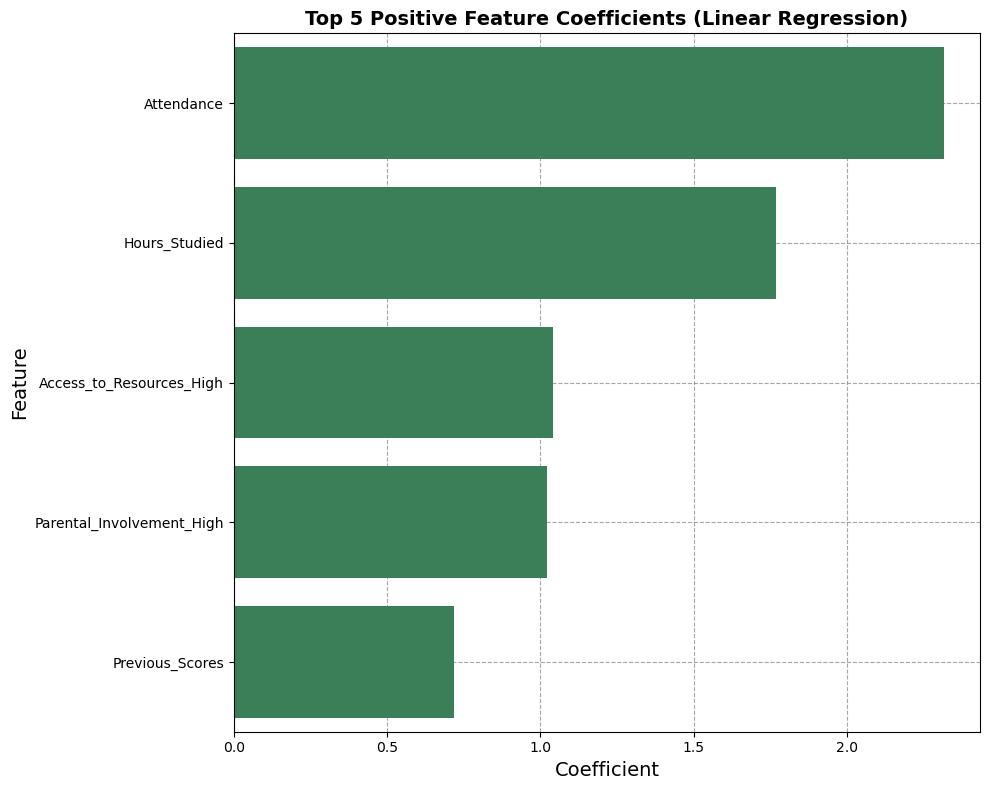

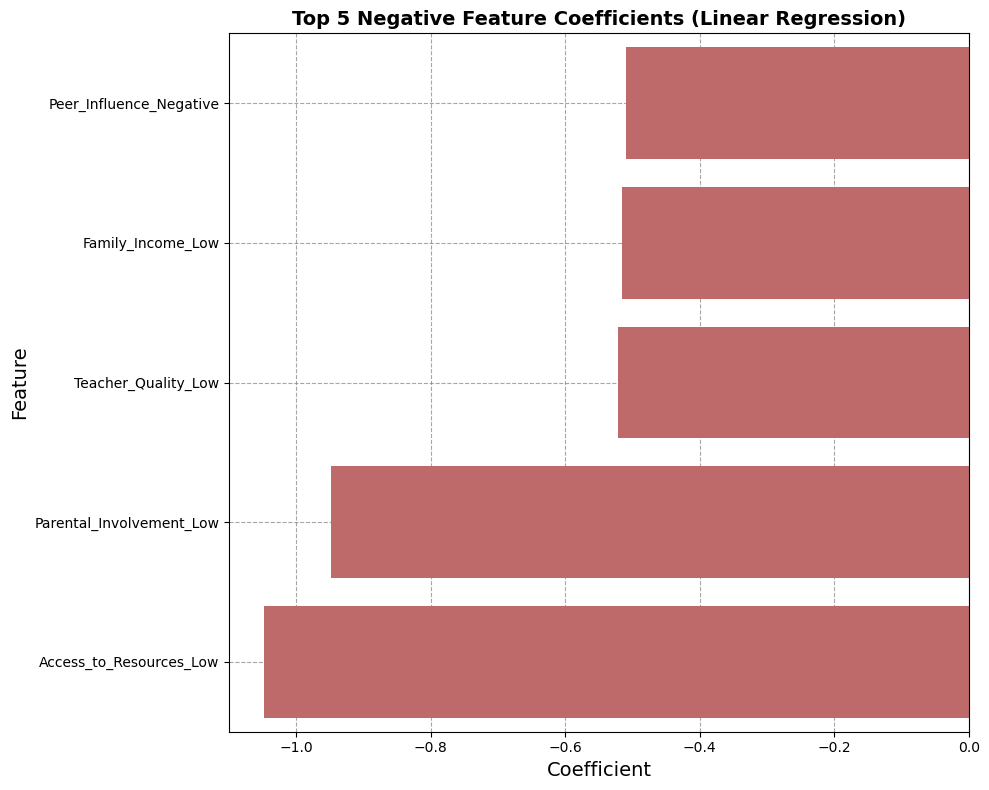

In [14]:
plt.figure(figsize=(10,8))
ax = sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coef_df.head(),
    color='seagreen'
)

plt.title("Top 5 Positive Feature Coefficients (Linear Regression)", fontweight='bold', fontsize=14)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7, color='grey')
ax.set_axisbelow(True)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coef_df.tail(),
    color='indianred'
)

plt.title("Top 5 Negative Feature Coefficients (Linear Regression)", fontweight='bold', fontsize=14)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, color='grey')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

### Plotting relationships between high coefficient features and target 

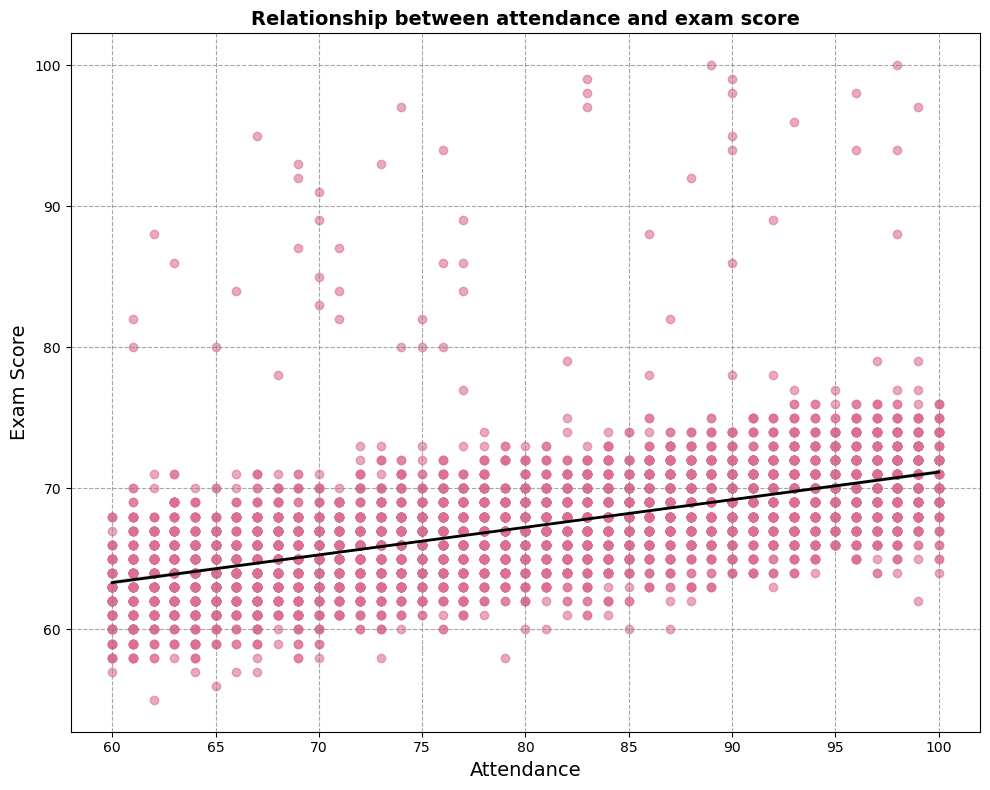

In [15]:
plt.figure(figsize=(10,8))
sns.regplot(
    x=X['Attendance'],
    y=y,
    scatter_kws={'alpha':0.6, 'color':'palevioletred'},
    line_kws={'linewidth':2, 'color':'black'}
)

plt.title("Relationship between attendance and exam score", fontweight='bold', fontsize=14)
plt.xlabel("Attendance", fontsize=14)
plt.ylabel("Exam Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, color='grey')
plt.tight_layout()
plt.show()

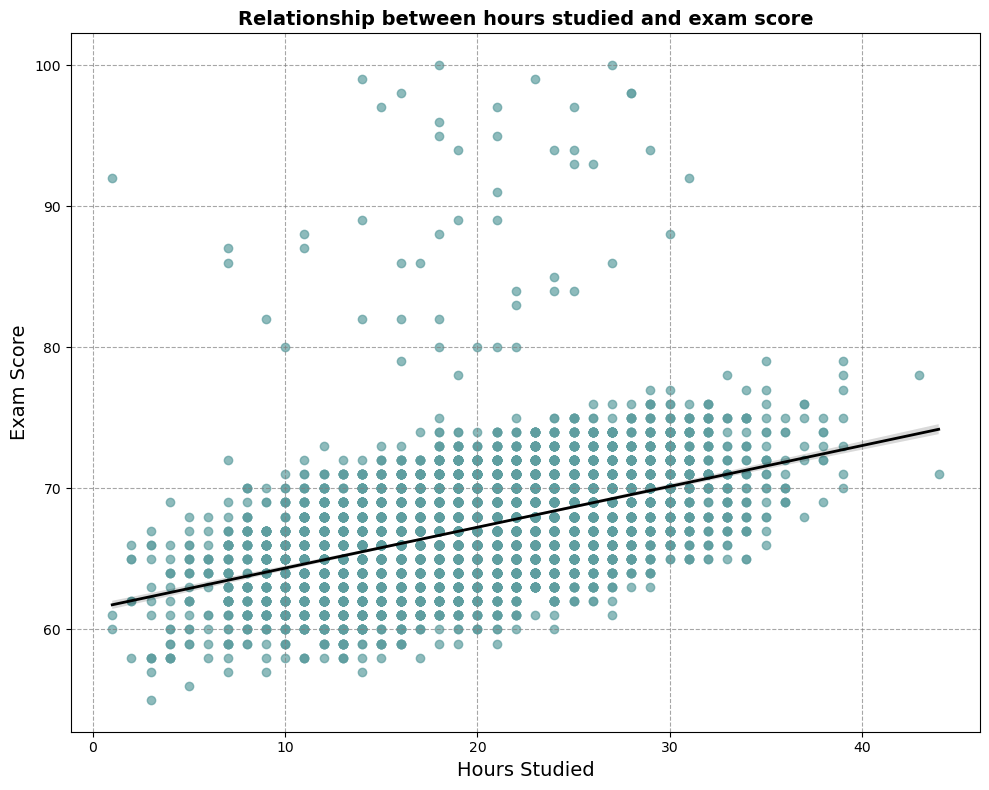

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(
    x=X['Hours_Studied'],
    y=y,
    scatter_kws={'alpha':0.7, 'color':'cadetblue'},
    line_kws={'linewidth':2, 'color':'black'}
)

plt.title("Relationship between hours studied and exam score", fontweight='bold', fontsize=14)
plt.xlabel("Hours Studied", fontsize=14)
plt.ylabel("Exam Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, color='grey')
plt.tight_layout()
plt.show()

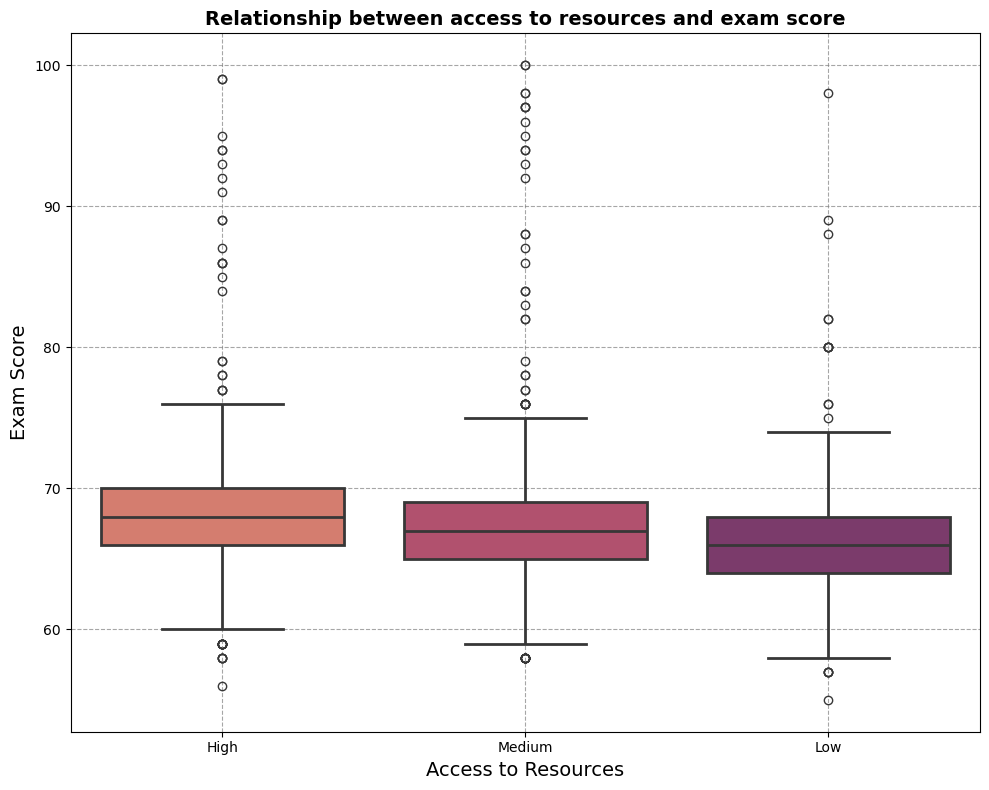

In [17]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=data, linewidth=2, hue='Access_to_Resources', palette='flare')

plt.title("Relationship between access to resources and exam score", fontweight='bold', fontsize=14)
plt.xlabel("Access to Resources", fontsize=14)
plt.ylabel("Exam Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

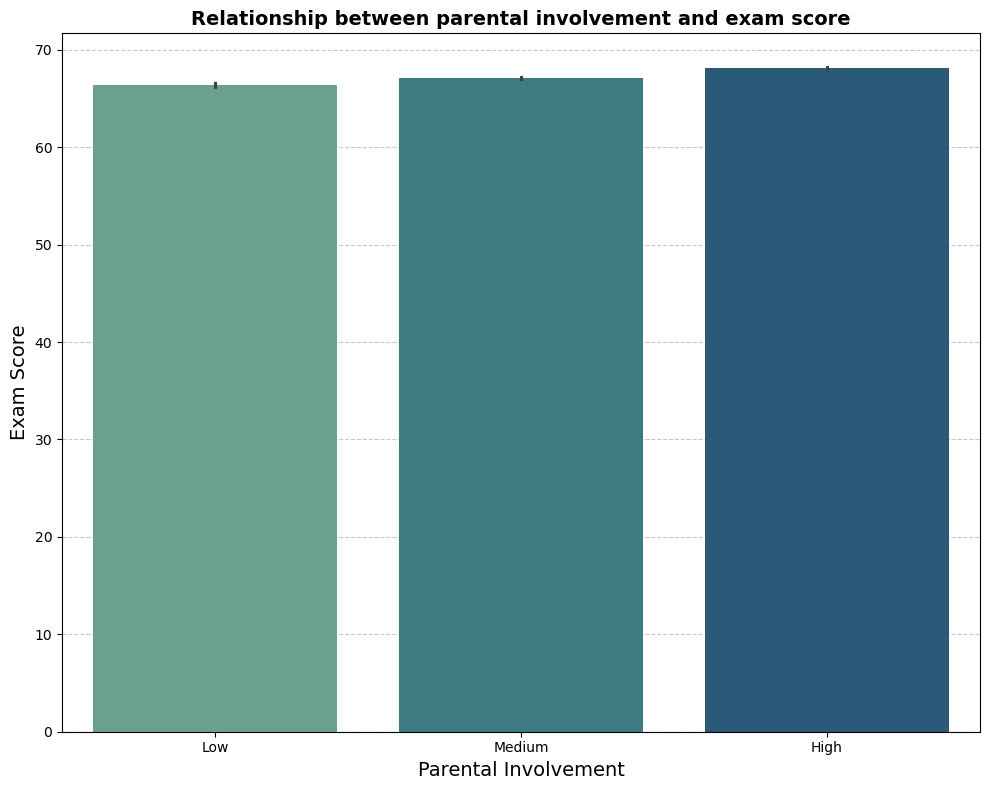

In [18]:
plt.figure(figsize=(10,8))

bars = sns.barplot(x='Parental_Involvement', y='Exam_Score', data=data, linewidth=2, hue='Parental_Involvement', palette='crest')

ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("Relationship between parental involvement and exam score", fontweight='bold', fontsize=14)
plt.xlabel("Parental Involvement", fontsize=14)
plt.ylabel("Exam Score", fontsize=14)

plt.tight_layout()
plt.show()

### Evaluating the Linear Regression model's performance

In [19]:
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
r2_LR = r2_score(y_test, y_pred_LR)
train_LR =  lr.score(X_train,y_train)
test_LR = lr.score(X_test,y_test)

print("RMSE: ", rmse_LR)
print("R²:", r2_LR)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_LR))
print("Train Score: ", train_LR)
print("Test Score: ", test_LR)

RMSE:  1.9660468497851002
R²: 0.7352312723372865
Mean Squared Error:  3.865340215549917
Train Score:  0.7254699550532622
Test Score:  0.7352312723372865


### Plotting true and predicted values of our Linear Regression model

The black line shows the ideal case where predictions match the actual values perfectly. <br>
The blue diamond points each show one observation (true value, predicted value), the closer the diamond is to the black line, the better the prediction. <br>
The blue line shows the best-fit linear trend between actual and predicted values.

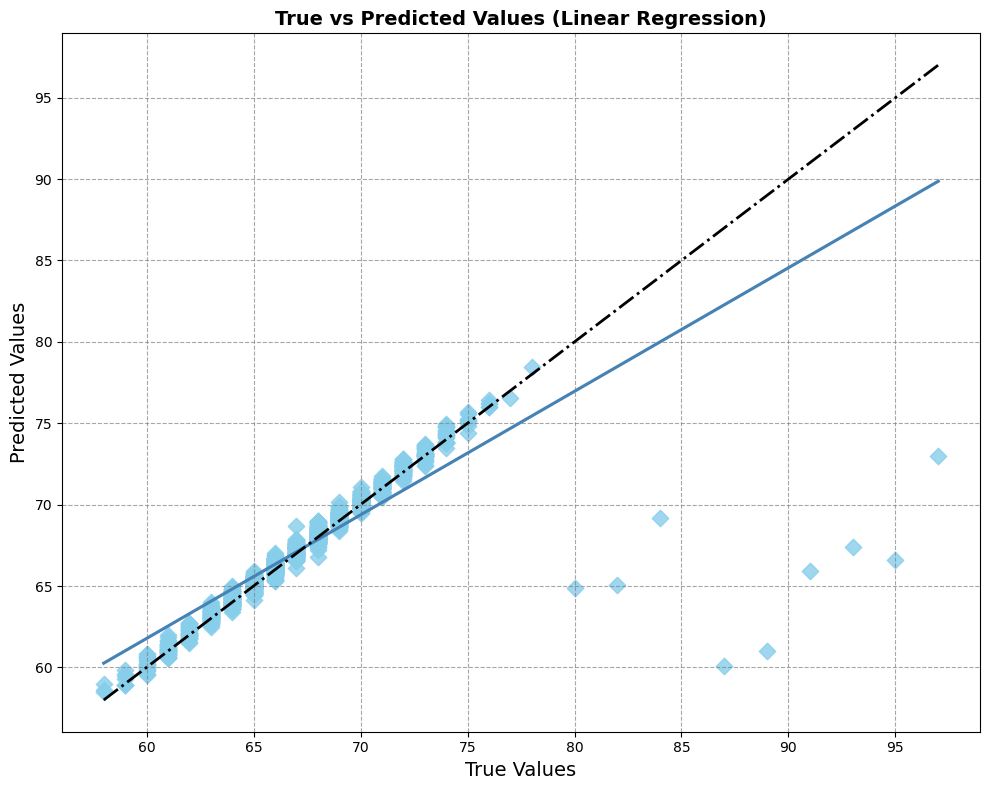

In [20]:
plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred_LR, ci=None, color='steelblue', marker='D', scatter_kws={'s':70, 'alpha':0.8, 'color':'skyblue'})

max_val = max(max(y_test), max(y_pred_LR))
min_val = min(min(y_test), min(y_pred_LR))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-.', linewidth=2)

plt.title('True vs Predicted Values (Linear Regression)', fontweight='bold', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

### Performing k-fold cross-validation for our Linear Regression model

In [21]:
scores_LR = cross_val_score(
    lr,
    X_final,
    y,
    cv=5,
    scoring='r2'
)

print("R² for each fold:", scores_LR)
print("Mean R²:", scores_LR.mean())

R² for each fold: [0.62563892 0.72512336 0.70827784 0.7330688  0.84042628]
Mean R²: 0.7265070398026219


In [22]:
mse_scores = -cross_val_score(
    lr, 
    X_final, 
    y, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

rmse_scores_LR = np.sqrt(mse_scores)
print("RMSE for each fold:", rmse_scores_LR)
print("Mean RMSE:", rmse_scores_LR.mean())

RMSE for each fold: [2.42385916 2.04906692 2.09269563 2.00988244 1.51831482]
Mean RMSE: 2.0187637934549043


### Plotting k-fold cross-validation results

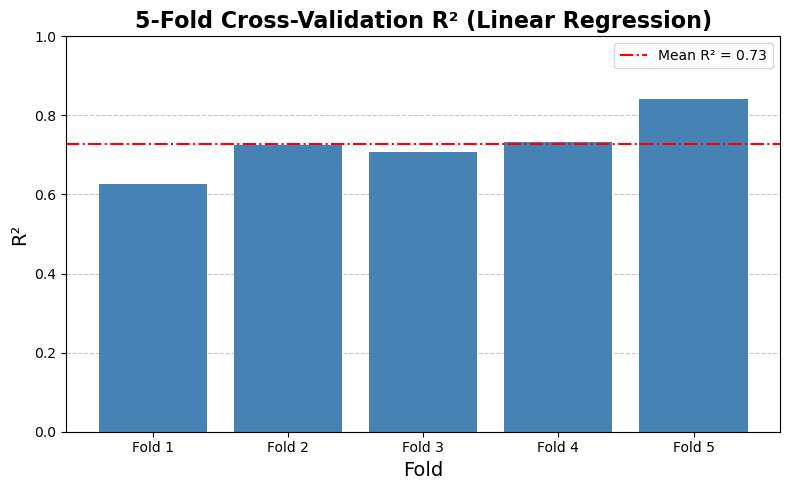

In [23]:
folds = [f'Fold {i+1}' for i in range(len(scores_LR))]

plt.figure(figsize=(8,5))
bars = plt.bar(folds, scores_LR, color='steelblue')
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.axhline(scores_LR.mean(), color='red', linestyle='-.', label=f'Mean R² = {scores_LR.mean():.2f}')
plt.title('5-Fold Cross-Validation R² (Linear Regression)', fontweight='bold', fontsize=16)
plt.ylabel('R²', fontsize=14)
plt.xlabel('Fold', fontsize=14)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()

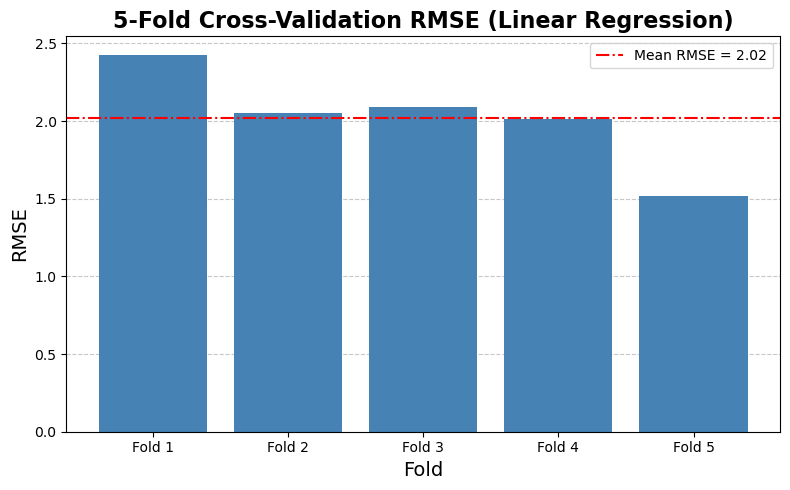

In [24]:
folds = [f'Fold {i+1}' for i in range(len(rmse_scores_LR))]

plt.figure(figsize=(8,5))
bars = plt.bar(folds, rmse_scores_LR, color='steelblue')
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.axhline(rmse_scores_LR.mean(), color='red', linestyle='-.', label=f'Mean RMSE = {rmse_scores_LR.mean():.2f}')
plt.title('5-Fold Cross-Validation RMSE (Linear Regression)', fontweight='bold', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Fold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## K-Neighbors Regressor model

In [25]:
errors = []
results_r2 = []

for k in range(1, 31):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    errors.append(mean_squared_error(y_test, pred))
    results_r2.append(r2_score(y_test, pred))

best_k_rmse = np.argmin(errors) + 1
best_k_r2 = np.argmax(results_r2) + 1

print("Best k by RMSE:", best_k_rmse)
print("Best k by R²:", best_k_r2)

Best k by RMSE: 24
Best k by R²: 24


In [26]:
knn = KNeighborsRegressor(n_neighbors=best_k_rmse)
knn.fit(X_train, y_train)

y_pred_KNN = knn.predict(X_test)

### Evaluating the K-Neighbors Regressor model's performance

In [27]:
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN))
r2_KNN = r2_score(y_test, y_pred_KNN)
train_KNN = knn.score(X_train,y_train)
test_KNN = knn.score(X_test,y_test)

print("RMSE: ", rmse_KNN)
print("R²:", r2_KNN)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_KNN))
print("Train Score: ", train_KNN)
print("Test Score: ", test_KNN)

RMSE:  2.445675153451727
R²: 0.5902900547900659
Mean Squared Error:  5.981326956211128
Train Score:  0.6054503006002538
Test Score:  0.5902900547900659


### Plotting true and predicated values of our K-Neighbors Regressor model

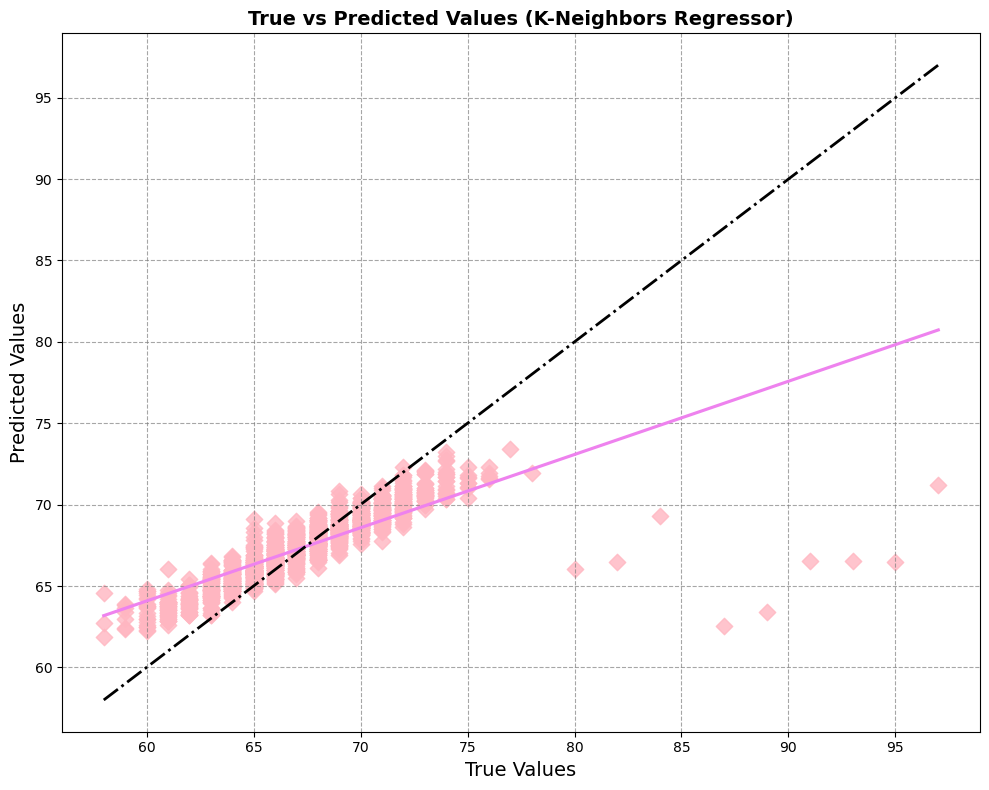

In [28]:
plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred_KNN, ci=None, color='violet', marker='D', scatter_kws={'s':70, 'alpha':0.8, 'color':'lightpink'})

max_val = max(max(y_test), max(y_pred_KNN))
min_val = min(min(y_test), min(y_pred_KNN))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-.', linewidth=2)

plt.title('True vs Predicted Values (K-Neighbors Regressor)', fontweight='bold', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

### Performing k-fold cross-validation for our K-Neighbors Regressor model

In [29]:
scores_KNN = cross_val_score(
    knn,
    X_final,
    y,
    cv=5,
    scoring='r2'
)

print("R² for each fold:", scores_KNN)
print("Mean R²:", scores_KNN.mean())

R² for each fold: [0.49603993 0.56987246 0.57898768 0.57859638 0.65735401]
Mean R²: 0.5761700899681885


In [30]:
mse_scores = -cross_val_score(
    knn, 
    X_final, 
    y, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

rmse_scores_KNN = np.sqrt(mse_scores)
print("RMSE for each fold:", rmse_scores_KNN)
print("Mean RMSE:", rmse_scores_KNN.mean())

RMSE for each fold: [2.81228999 2.56321981 2.51402016 2.52534153 2.22486658]
Mean RMSE: 2.5279476153621117


### Plotting k-fold cross-validation results

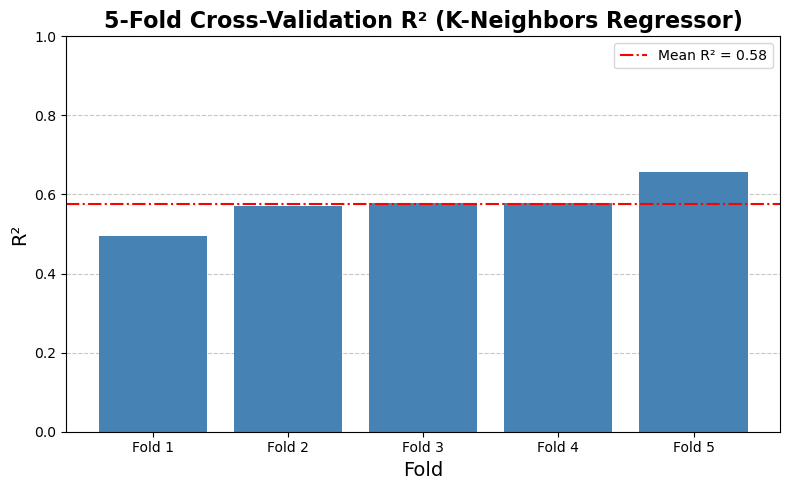

In [31]:
folds = [f'Fold {i+1}' for i in range(len(scores_KNN))]

plt.figure(figsize=(8,5))
bars = plt.bar(folds, scores_KNN, color='steelblue')
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.axhline(scores_KNN.mean(), color='red', linestyle='-.', label=f'Mean R² = {scores_KNN.mean():.2f}')
plt.title('5-Fold Cross-Validation R² (K-Neighbors Regressor)', fontweight='bold', fontsize=16)
plt.ylabel('R²', fontsize=14)
plt.xlabel('Fold', fontsize=14)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()

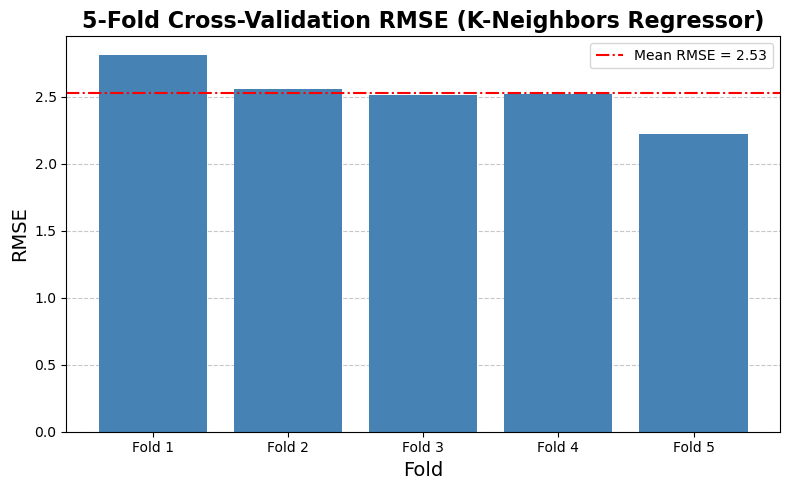

In [32]:
folds = [f'Fold {i+1}' for i in range(len(rmse_scores_KNN))]

plt.figure(figsize=(8,5))
bars = plt.bar(folds, rmse_scores_KNN, color='steelblue')
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.axhline(rmse_scores_KNN.mean(), color='red', linestyle='-.', label=f'Mean RMSE = {rmse_scores_KNN.mean():.2f}')
plt.title('5-Fold Cross-Validation RMSE (K-Neighbors Regressor)', fontweight='bold', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Fold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Support Vector Regression model

In [33]:
# testing the kernels
kernels = ["linear", "rbf", "poly"]
rmse_list = []
r2_list = []
pred_list = []
train_score_list = []
test_score_list = []
svr_models = []

rmse_best_svr = 100
r2_best_svr = 100
train_best_svr = 100
test_best_svr = 100

for kernel in kernels:
    svrModel = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel=kernel))
    ])

    svrModel.fit(X_train, y_train)
    y_pred_SVR = svrModel.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_SVR)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_SVR)
    train_score = svrModel.score(X_train,y_train)
    test_score = svrModel.score(X_test,y_test)

    if rmse < rmse_best_svr:
        rmse_best_svr = rmse
        r2_best_svr = r2
        train_best_svr = train_score
        test_best_svr = test_score

    rmse_list.append(rmse)
    r2_list.append(r2)
    pred_list.append(y_pred_SVR)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    svr_models.append(svrModel)

    print(f"Kernel: {kernel}")
    print(f"   RMSE: {rmse}")
    print(f"   R²:   {r2}")
    print(f"   Train Score: {train_score}")
    print(f"   Test Score:   {test_score}")
    print()

Kernel: linear
   RMSE: 1.9617084751058196
   R²:   0.7363984862243718
   Train Score: 0.7220847094014873
   Test Score:   0.7363984862243718

Kernel: rbf
   RMSE: 1.9894512864128135
   R²:   0.7288899717622956
   Train Score: 0.7287395618736039
   Test Score:   0.7288899717622956

Kernel: poly
   RMSE: 2.0195828944133227
   R²:   0.7206154856559182
   Train Score: 0.7320407938778979
   Test Score:   0.7206154856559182



### Plotting the different kernels' performance

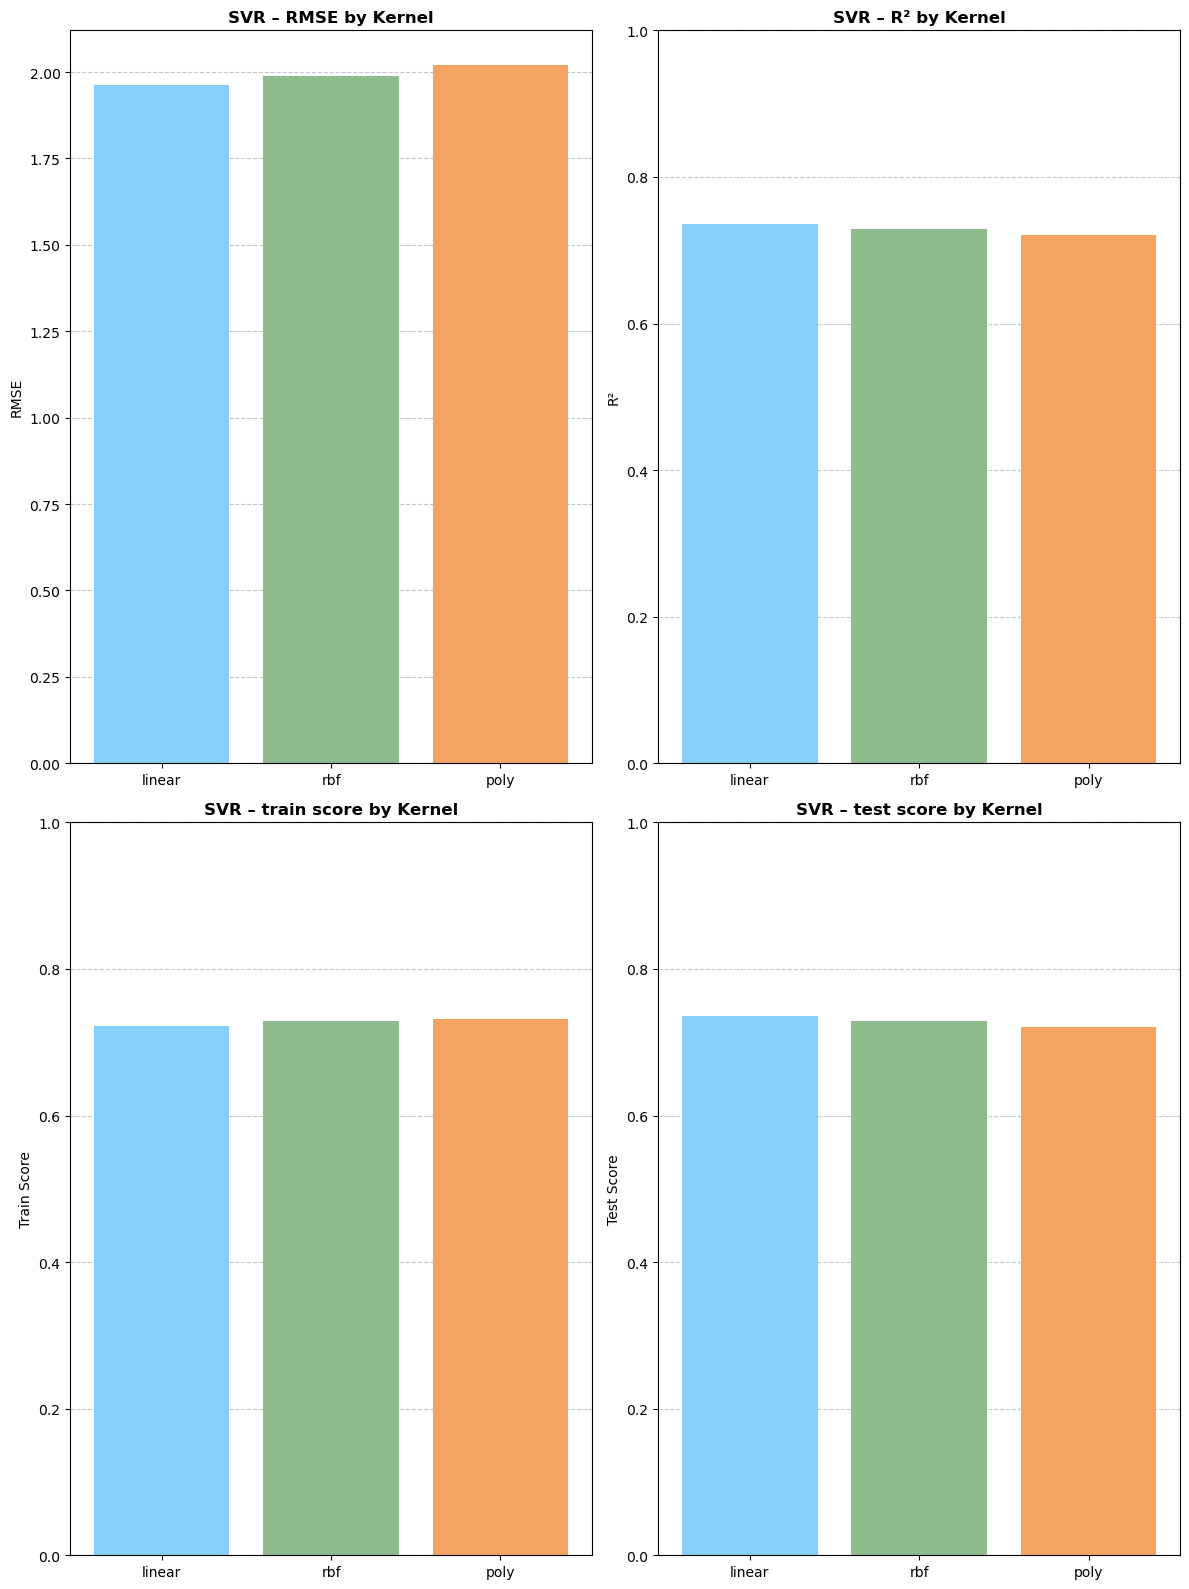

In [34]:
# visualizing the differences
plt.figure(figsize=(12,16))

# RMSE plot
plt.subplot(2,2,1)
bars = plt.bar(kernels, rmse_list, color=['lightskyblue','darkseagreen','sandybrown'])
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("SVR – RMSE by Kernel", fontweight='bold')
plt.ylabel("RMSE")

# R2 plot
plt.subplot(2,2,2)
bars = plt.bar(kernels, r2_list, color=['lightskyblue','darkseagreen','sandybrown'])
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("SVR – R² by Kernel", fontweight='bold')
plt.ylabel("R²")
plt.ylim(0, 1)

# train score plot
plt.subplot(2,2,3)
bars = plt.bar(kernels, train_score_list, color=['lightskyblue','darkseagreen','sandybrown'])
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("SVR – train score by Kernel", fontweight='bold')
plt.ylabel("Train Score")
plt.ylim(0, 1)

# test score plot
plt.subplot(2,2,4)
bars = plt.bar(kernels, test_score_list, color=['lightskyblue','darkseagreen','sandybrown'])
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("SVR – test score by Kernel", fontweight='bold')
plt.ylabel("Test Score")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Plotting true and predicated values of our Support Vector Regression model

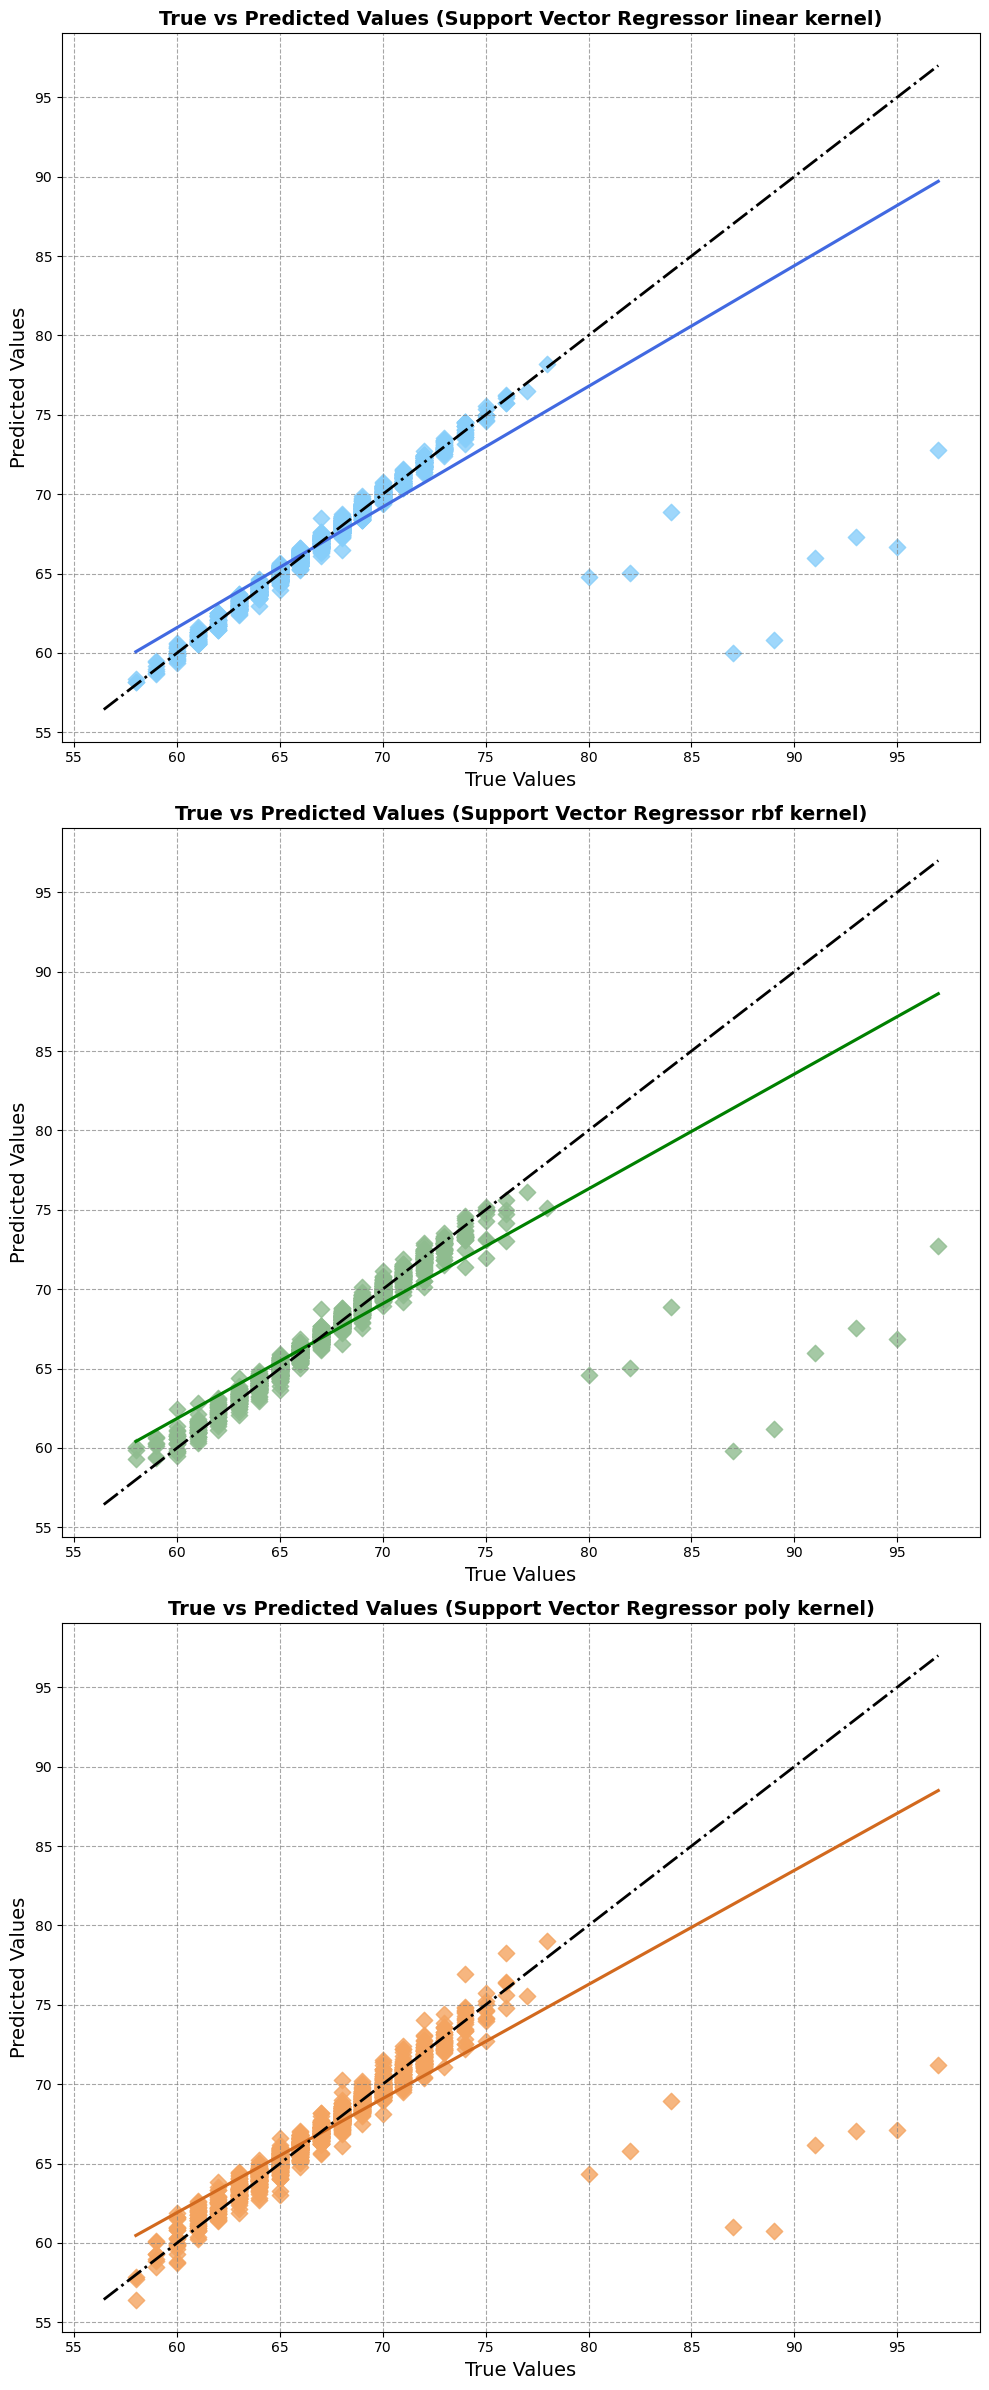

In [35]:
plt.figure(figsize=(10,24))
colors_plot = ['royalblue', 'green', 'chocolate', 'lightskyblue', 'darkseagreen', 'sandybrown']

for i, model in enumerate(kernels):
    plt.subplot(3, 1, i+1)
    sns.regplot(x=y_test, y=pred_list[i], ci=None, color=colors_plot[i], marker='D', scatter_kws={'s':70, 'alpha':0.8, 'color':colors_plot[i+3]})
    
    max_val = max(max(y_test), max(y_pred_SVR))
    min_val = min(min(y_test), min(y_pred_SVR))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-.', linewidth=2)
    
    plt.title(f'True vs Predicted Values (Support Vector Regressor {kernels[i]} kernel)', fontweight='bold', fontsize=14)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

### Performing k-fold cross-validation for our Support Vector Regression model

In [36]:
svr_linear_scores_r2 = []
svr_rbf_scores_r2 = []
svr_poly_scores_r2 = []

for i, svr_model in enumerate(svr_models):
    scores = cross_val_score(
        svr_model,
        X_final,
        y,
        cv=5,
        scoring='r2'
    )

    print(f'{kernels[i]}:')
    print("R² for each fold:", scores)
    print("Mean R²:", scores.mean())

    if i == 0:
        svr_linear_scores_r2 = scores
    elif i == 1:
        svr_rbf_scores_r2 = scores
    else:
        svr_poly_scores_r2 = scores

svr_scores_r2 = [svr_linear_scores_r2, svr_rbf_scores_r2, svr_poly_scores_r2]

linear:
R² for each fold: [0.62350296 0.72428052 0.70856881 0.73312217 0.84262671]
Mean R²: 0.7264202369288688
rbf:
R² for each fold: [0.61796407 0.71021097 0.70282969 0.72686896 0.83103296]
Mean R²: 0.7177813316284405
poly:
R² for each fold: [0.61007641 0.71800707 0.69571337 0.71536946 0.82039892]
Mean R²: 0.7119130469397285


In [37]:
svr_linear_scores_rmse = []
svr_rbf_scores_rmse = []
svr_poly_scores_rmse = []

for i, svr_model in enumerate(svr_models):
    mse_scores = -cross_val_score(
        svr_model, 
        X_final, 
        y, 
        cv=5, 
        scoring='neg_mean_squared_error'
    )
    
    rmse_scores = np.sqrt(mse_scores)
    print(f'{kernels[i]}:')
    print("RMSE for each fold:", rmse_scores)
    print("Mean RMSE:", rmse_scores.mean())

    if i == 0:
        svr_linear_scores_rmse = rmse_scores
    elif i == 1:
        svr_rbf_scores_rmse = rmse_scores
    else:
        svr_poly_scores_rmse = rmse_scores

svr_scores_rmse = [svr_linear_scores_rmse, svr_rbf_scores_rmse, svr_poly_scores_rmse]

linear:
RMSE for each fold: [2.43076412 2.05220597 2.0916517  2.00968152 1.5078101 ]
Mean RMSE: 2.0184226822055633
rbf:
RMSE for each fold: [2.44857911 2.10391502 2.11214661 2.03308961 1.5623637 ]
Mean RMSE: 2.0520188079710198
poly:
RMSE for each fold: [2.47372712 2.07542161 2.13728672 2.07544744 1.61077772]
Mean RMSE: 2.0745321219516137


### Plotting k-fold cross-validation results

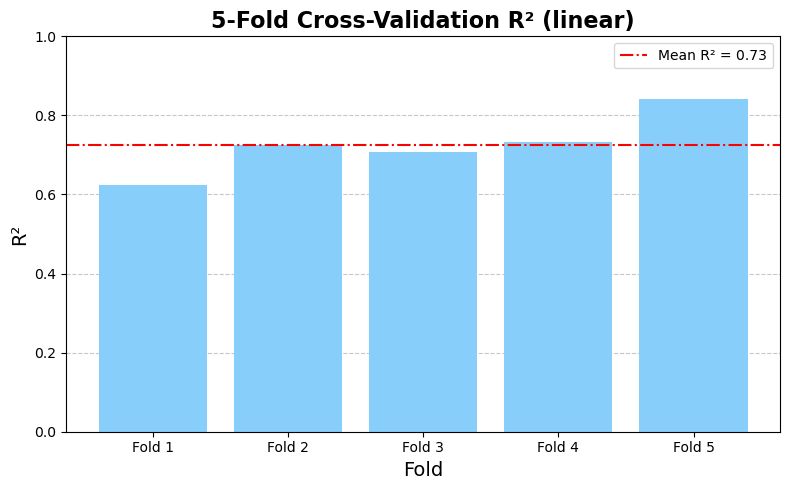

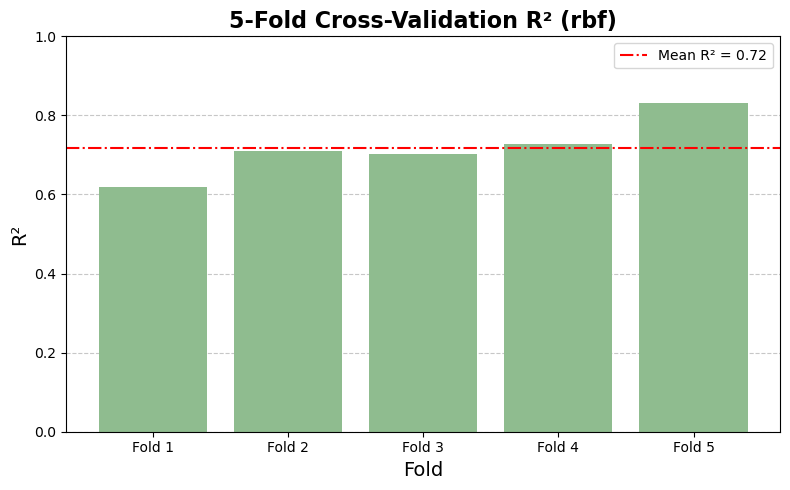

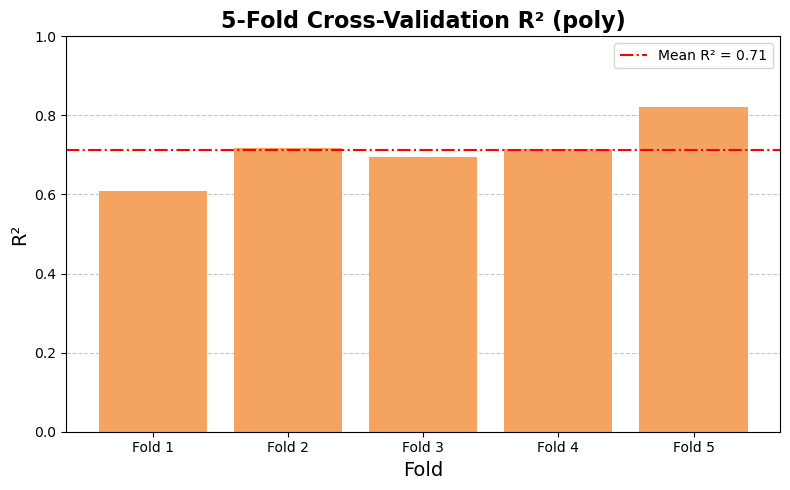

In [38]:
colors_kfold = ['lightskyblue', 'darkseagreen', 'sandybrown']

for i, scores in enumerate(svr_scores_r2):
    folds = [f'Fold {i+1}' for i in range(len(scores))]
    
    plt.figure(figsize=(8,5))
    bars = plt.bar(folds, scores, color=colors_kfold[i])
    ax = plt.gca()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    plt.axhline(scores.mean(), color='red', linestyle='-.', label=f'Mean R² = {scores.mean():.2f}')
    plt.title(f'5-Fold Cross-Validation R² ({kernels[i]})', fontweight='bold', fontsize=16)
    plt.ylabel('R²', fontsize=14)
    plt.xlabel('Fold', fontsize=14)
    plt.ylim(0,1)
    plt.legend()
    plt.tight_layout()
    plt.show()

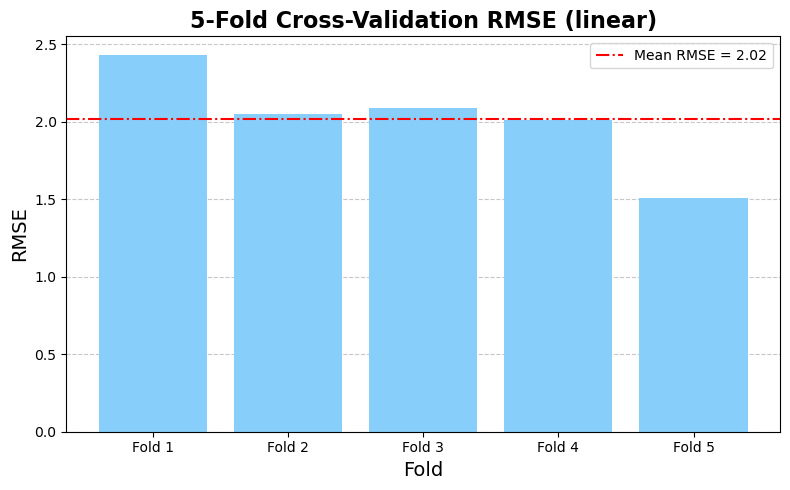

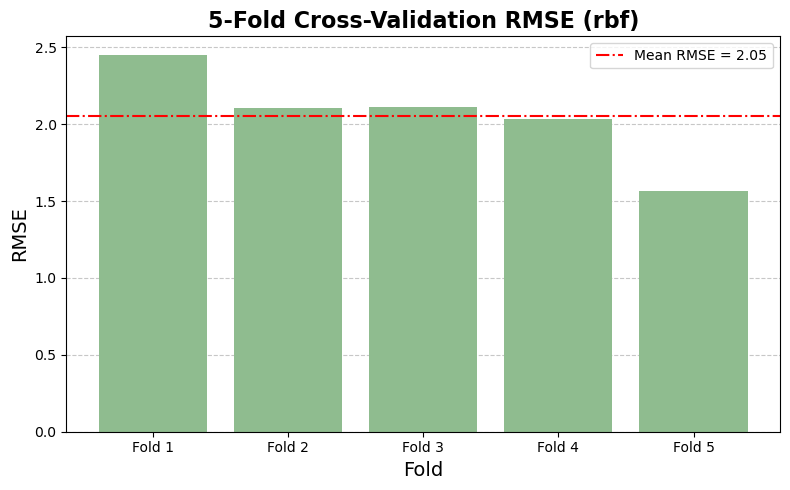

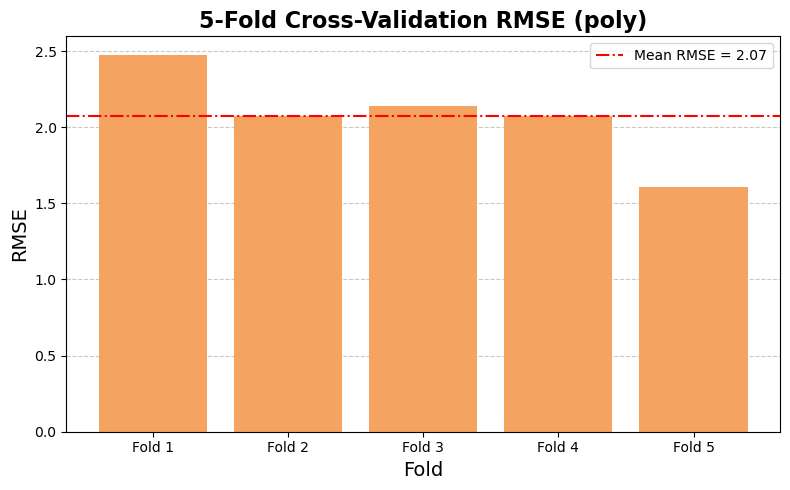

In [39]:
for i, rmse_scores in enumerate(svr_scores_rmse):
    folds = [f'Fold {i+1}' for i in range(len(rmse_scores))]
    
    plt.figure(figsize=(8,5))
    bars = plt.bar(folds, rmse_scores, color=colors_kfold[i])
    ax = plt.gca()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    plt.axhline(rmse_scores.mean(), color='red', linestyle='-.', label=f'Mean RMSE = {rmse_scores.mean():.2f}')
    plt.title(f'5-Fold Cross-Validation RMSE ({kernels[i]})', fontweight='bold', fontsize=16)
    plt.ylabel('RMSE', fontsize=14)
    plt.xlabel('Fold', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Random Forest

### Testing seperate Random forest parameter configurations

In [40]:
print("random forest parameters")

paramConfigs = [
    {"nEstimators": 50,  "maxDepth": None, "minSamplesSplit": 2},
    {"nEstimators": 100, "maxDepth": None, "minSamplesSplit": 2},
    {"nEstimators": 200, "maxDepth": None, "minSamplesSplit": 2},
    {"nEstimators": 50,  "maxDepth": 10,   "minSamplesSplit": 5},
    {"nEstimators": 100, "maxDepth": 10,   "minSamplesSplit": 5},
    {"nEstimators": 200, "maxDepth": 10,   "minSamplesSplit": 5},
    {"nEstimators": 50,  "maxDepth": 20,   "minSamplesSplit": 10},
    {"nEstimators": 100, "maxDepth": 20,   "minSamplesSplit": 10},
    {"nEstimators": 400, "maxDepth": 20,   "minSamplesSplit": 10},
]

rmseList = []
r2List = []
predList = []
trainScoreList = []
testScoreList = []
rfModels = []

rmseBestRf = float('inf')
r2BestRf = float('inf')
trainBestRf = float('inf')
testBestRf = float('inf')
bestModelIndex = 0

for i, params in enumerate(paramConfigs):
    rfModel = RandomForestRegressor(n_estimators=params["nEstimators"],max_depth=params["maxDepth"],min_samples_split=params["minSamplesSplit"],
        random_state=42,n_jobs=-1,verbose=0)
    
    rfModel.fit(X_train, y_train)
    yTrainPred = rfModel.predict(X_train)
    yTestPred = rfModel.predict(X_test)
    mse = mean_squared_error(y_test, yTestPred)
    rmse =np.sqrt(mse)
    r2 = r2_score(y_test, yTestPred)
    trainScore = r2_score(y_train, yTrainPred)
    testScore = r2_score(y_test, yTestPred)
    
    if rmse < rmseBestRf:
        rmseBestRf = rmse
        r2BestRf = r2
        trainBestRf =trainScore
        testBestRf = testScore
        bestModelIndex = i
        
    rmseList.append(rmse)
    r2List.append(r2)
    predList.append(yTestPred)
    trainScoreList.append(trainScore)
    testScoreList.append(testScore)
    rfModels.append(rfModel)

print("best model")
print(f"Best Configuration: {paramConfigs[bestModelIndex]}")
print(f"RMSE: {rmseBestRf:.4f}")
print(f"R2:   {r2BestRf:.4f}")
print(f"Train Score: {trainBestRf:.4f}")
print(f"Test Score:  {testBestRf:.4f}")


random forest parameters
best model
Best Configuration: {'nEstimators': 400, 'maxDepth': 20, 'minSamplesSplit': 10}
RMSE: 2.2440
R2:   0.6551
Train Score: 0.8452
Test Score:  0.6551


### Plotting for the best configuration for a Random forest

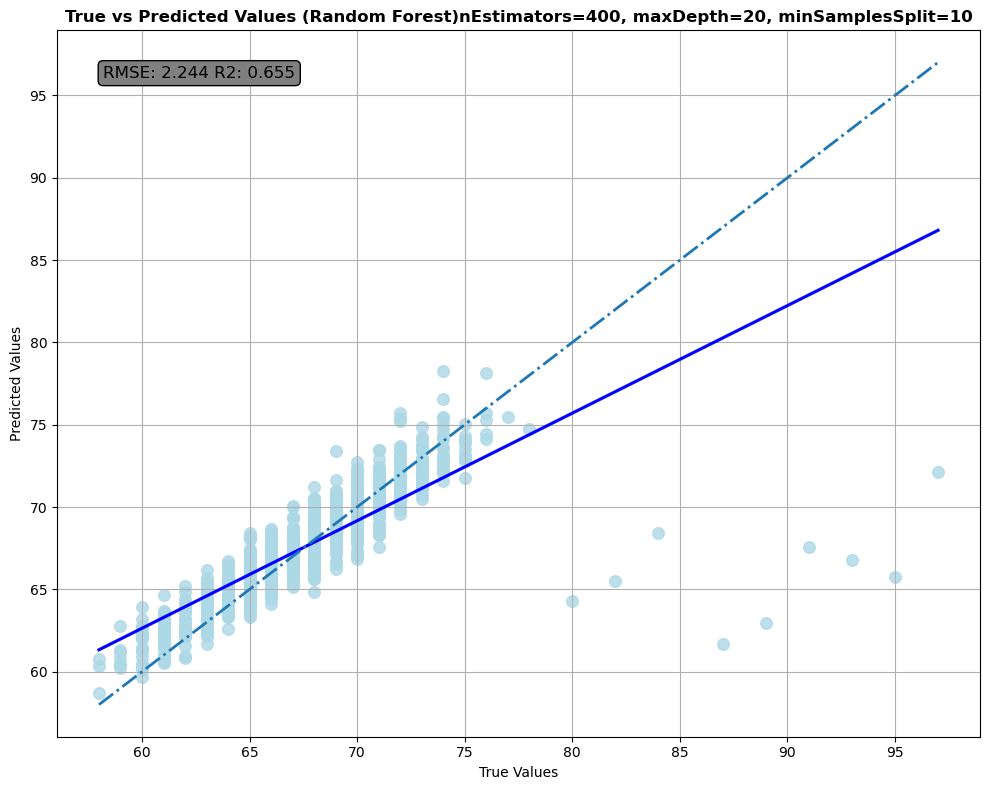

In [41]:
bestRfModel = rfModels[bestModelIndex]
yPredBestRf = predList[bestModelIndex]
plt.figure(figsize=(10, 8))

sns.regplot(x=y_test,y=yPredBestRf,ci=None,color='blue',scatter_kws={'s': 70,'color': 'lightblue'})

maxVal = max(max(y_test), max(yPredBestRf))
minVal = min(min(y_test), min(yPredBestRf))
plt.plot([minVal, maxVal],[minVal, maxVal],linestyle='-.',linewidth=2)

bestParams = paramConfigs[bestModelIndex]
plt.title(
    f'True vs Predicted Values (Random Forest)'
    f'nEstimators={bestParams["nEstimators"]}, '
    f'maxDepth={bestParams["maxDepth"] if bestParams["maxDepth"] else "None"}, '
    f'minSamplesSplit={bestParams["minSamplesSplit"]}',
    fontweight='bold'
)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
metricsText = f'RMSE: {rmseBestRf:.3f} R2: {r2BestRf:.3f}'
plt.grid(True)
plt.text(0.05, 0.95,metricsText,transform=plt.gca().transAxes,fontsize=12,verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='grey')
)

plt.tight_layout()
plt.show()


### Validation Random forest with a 5 fold cross validation.

Random forest cross validation


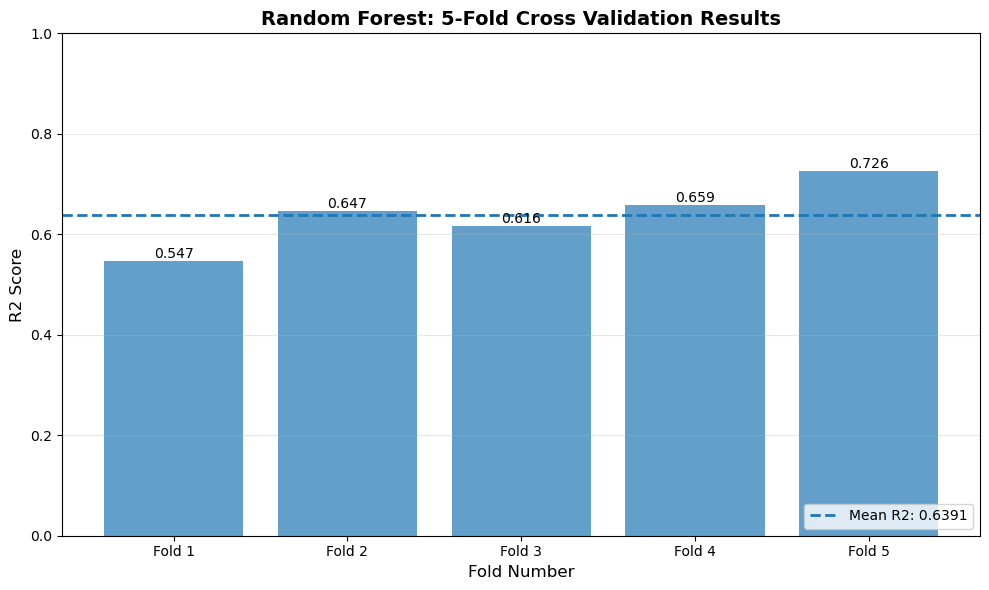

Difference (Single - CV): 0.0117


In [42]:
print("Random forest cross validation")

rfCv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
cvScoresR2RF = cross_val_score(rfCv, X_final, y, cv=5, scoring='r2', n_jobs=-1)
cvScoresMseRF = cross_val_score(rfCv, X_final, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
plt.figure(figsize=(10, 6))
xPos = np.arange(len(cvScoresR2RF)) + 1
bars = plt.bar(xPos, cvScoresR2RF, alpha=0.7)

plt.axhline(y=cvScoresR2RF.mean(),linestyle='--',linewidth=2,label=f'Mean R2: {cvScoresR2RF.mean():.4f}')

plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Random Forest: 5-Fold Cross Validation Results',fontsize=14,fontweight='bold')

plt.xticks(xPos, [f'Fold {i}' for i in xPos])
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, cvScoresR2RF):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.,height,f'{score:.3f}',ha='center',va='bottom',fontsize=10)

plt.tight_layout()
plt.show()

singleRf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
singleRf.fit(X_train, y_train)

singleTestPred = singleRf.predict(X_test)
singleR2 = r2_score(y_test, singleTestPred)
singleRmse = np.sqrt(mean_squared_error(y_test, singleTestPred))

difference = singleR2 - cvScoresR2RF.mean()
print(f"Difference (Single - CV): {difference:.4f}")


## Decision trees

#### Testing a variety of decision tree parameters

In [43]:
print("decision tree parameters")

paramConfigs = [
    {"max_depth": 5, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 10, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 20, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_split": 5, "min_samples_leaf": 5},
    {"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 5},
    {"max_depth": 20, "min_samples_split": 10, "min_samples_leaf": 5},
    {"max_depth": 30, "min_samples_split": 10, "min_samples_leaf": 5},]

rmseList = []
r2List = []
predList = []
trainScoreList = []
testScoreList = []
dtModels = []

rmseBestDt = float('inf')
r2BestDt = float('inf')
trainBestDt = float('inf')
testBestDt = float('inf')
bestModelIndex = 0

for i, params in enumerate(paramConfigs):    
    dtModel = DecisionTreeRegressor(
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        random_state=42
    )
    
    dtModel.fit(X_train, y_train)
    yTrainPred = dtModel.predict(X_train)
    yTestPred = dtModel.predict(X_test)
    
    mse = mean_squared_error(y_test, yTestPred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, yTestPred)
    trainScore = r2_score(y_train, yTrainPred)
    testScore = r2_score(y_test, yTestPred)
    
    if rmse < rmseBestDt:
        rmseBestDt = rmse
        r2BestDt = r2
        trainBestDt = trainScore
        testBestDt = testScore
        bestModelIndex = i
    
    rmseList.append(rmse)
    r2List.append(r2)
    predList.append(yTestPred)
    trainScoreList.append(trainScore)
    testScoreList.append(testScore)
    dtModels.append(dtModel)

print("best model")
print(f"Best Configuration: {paramConfigs[bestModelIndex]}")
print(f"RMSE: {rmseBestDt:.4f}")
print(f"R2:   {r2BestDt:.4f}")
print(f"Train Score: {trainBestDt:.4f}")
print(f"Test Score:  {testBestDt:.4f}")

decision tree parameters
best model
Best Configuration: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}
RMSE: 2.6352
R2:   0.5243
Train Score: 0.7481
Test Score:  0.5243


#### Graphing the best performing Decision tree configuration.

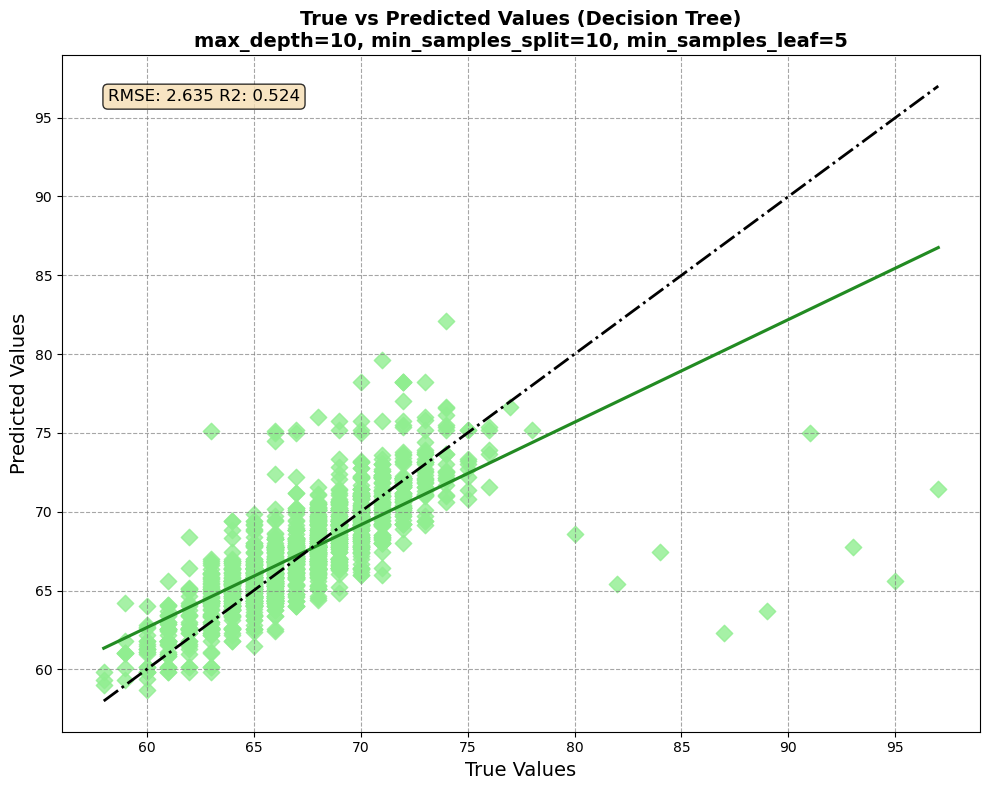

In [44]:
bestDtModel = dtModels[bestModelIndex]
yPredBestDt = predList[bestModelIndex]

plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=yPredBestDt, ci=None, color='forestgreen', 
            marker='D', scatter_kws={'s':70, 'alpha':0.8, 'color':'lightgreen'})

maxVal = max(max(y_test), max(yPredBestDt))
minVal = min(min(y_test), min(yPredBestDt))
plt.plot([minVal, maxVal], [minVal, maxVal], color='black', linestyle='-.', linewidth=2)

bestParams = paramConfigs[bestModelIndex]
plt.title(f'True vs Predicted Values (Decision Tree)\n'
          f'max_depth={bestParams["max_depth"] if bestParams["max_depth"] else "None"}, '
          f'min_samples_split={bestParams["min_samples_split"]}, '
          f'min_samples_leaf={bestParams["min_samples_leaf"]}', 
          fontweight='bold', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7, color='grey')

metricsText = f'RMSE: {rmseBestDt:.3f} R2: {r2BestDt:.3f}'
plt.text(0.05, 0.95, metricsText, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

#### 5 fold Validation for a decision tree

Decision tree cross validation


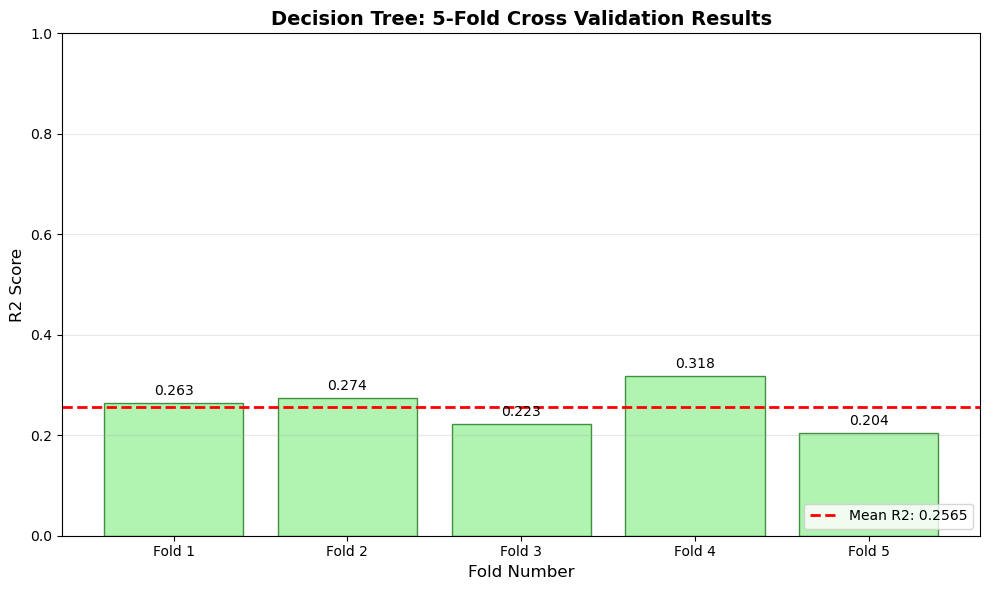

Difference (Single - CV): -0.0142


In [45]:
print("Decision tree cross validation")
dtCv = DecisionTreeRegressor(max_depth=10, random_state=42)
cvScoresR2DT = cross_val_score(dtCv, X_final, y, cv=5, scoring='r2', n_jobs=-1)
cvScoresMseDT = cross_val_score(dtCv, X_final, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

plt.figure(figsize=(10, 6))
xPos = np.arange(len(cvScoresR2DT)) + 1
bars = plt.bar(xPos, cvScoresR2DT, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.axhline(y=cvScoresR2DT.mean(), color='red', linestyle='--',linewidth=2, label=f'Mean R2: {cvScoresR2DT.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Decision Tree: 5-Fold Cross Validation Results', fontsize=14, fontweight='bold')
plt.xticks(xPos, [f'Fold {i}' for i in xPos])
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars, cvScoresR2DT):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

singleDt = DecisionTreeRegressor(max_depth=10, random_state=42)
singleDt.fit(X_train, y_train)
singleTestPred = singleDt.predict(X_test)
singleR2 = r2_score(y_test, singleTestPred)
singleRmse = np.sqrt(mean_squared_error(y_test, singleTestPred))
difference = singleR2 - cvScoresR2DT.mean()
print(f"Difference (Single - CV): {difference:.4f}")

## Lasso Regression

In [46]:
print("lasso regression parameters")

paramConfigs = [{"alpha": 0.001},{"alpha": 1},{"alpha": 1000},]
rmseList = []
r2List = []
predList = []
trainScoreList = []
testScoreList = []
lassoModels = []
rmseBestLasso = float('inf')
r2BestLasso = float('inf')
trainBestLasso = float('inf')
testBestLasso = float('inf')
bestModelIndex = 0

for i, params in enumerate(paramConfigs):    
    lassoModel = Lasso(alpha=params["alpha"],random_state=42,max_iter=10000)
    lassoModel.fit(X_train, y_train)
    yTrainPred = lassoModel.predict(X_train)
    yTestPred = lassoModel.predict(X_test)
    
    mse = mean_squared_error(y_test, yTestPred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, yTestPred)
    trainScore = r2_score(y_train, yTrainPred)
    testScore = r2_score(y_test, yTestPred)
    
    if rmse < rmseBestLasso:
        rmseBestLasso = rmse
        r2BestLasso = r2
        trainBestLasso = trainScore
        testBestLasso = testScore
        bestModelIndex = i
    
    rmseList.append(rmse)
    r2List.append(r2)
    predList.append(yTestPred)
    trainScoreList.append(trainScore)
    testScoreList.append(testScore)
    lassoModels.append(lassoModel)

print("best model")
print(f"Best Configuration: {paramConfigs[bestModelIndex]}")
print(f"RMSE: {rmseBestLasso:.4f}")
print(f"R2:   {r2BestLasso:.4f}")
print(f"Train Score: {trainBestLasso:.4f}")
print(f"Test Score:  {testBestLasso:.4f}")

lasso regression parameters
best model
Best Configuration: {'alpha': 0.001}
RMSE: 1.9663
R2:   0.7352
Train Score: 0.7255
Test Score:  0.7352


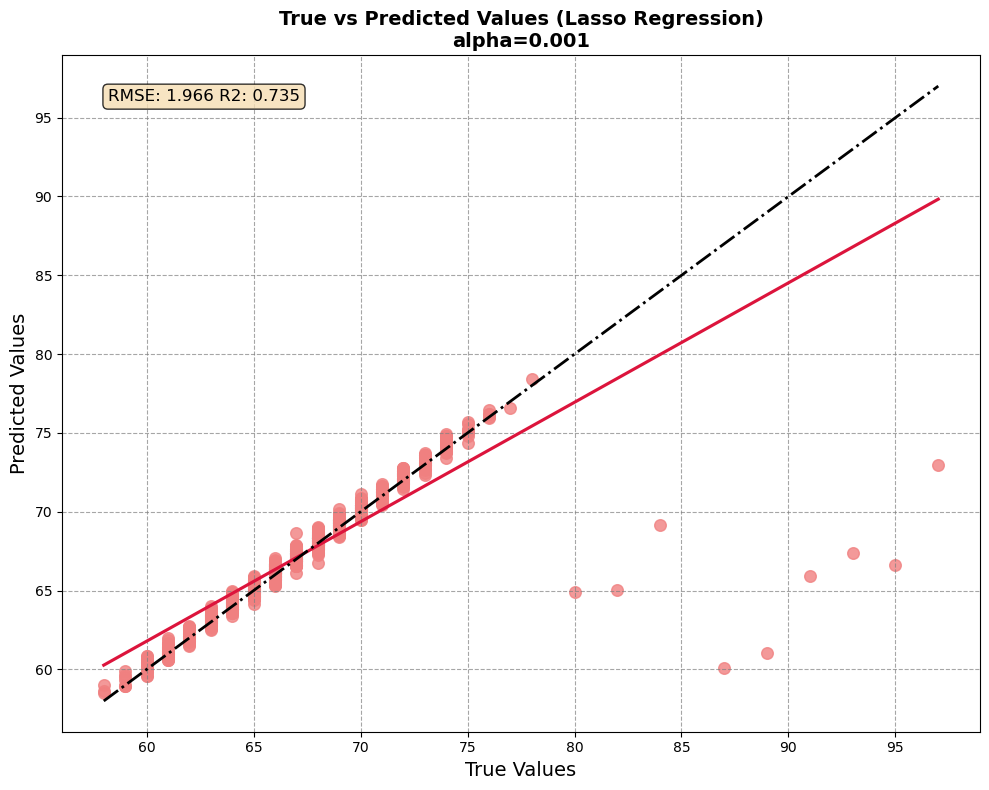

In [47]:
bestLassoModel = lassoModels[bestModelIndex]
yPredBestLasso = predList[bestModelIndex]

plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=yPredBestLasso, ci=None, color='crimson', 
            marker='o', scatter_kws={'s':70, 'alpha':0.8, 'color':'lightcoral'})

maxVal = max(max(y_test), max(yPredBestLasso))
minVal = min(min(y_test), min(yPredBestLasso))
plt.plot([minVal, maxVal], [minVal, maxVal], color='black', linestyle='-.', linewidth=2)

bestParams = paramConfigs[bestModelIndex]
plt.title(f'True vs Predicted Values (Lasso Regression)\n'
          f'alpha={bestParams["alpha"]}', 
          fontweight='bold', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7, color='grey')

metricsText = f'RMSE: {rmseBestLasso:.3f} R2: {r2BestLasso:.3f}'
plt.text(0.05, 0.95, metricsText, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

Lasso regression cross validation


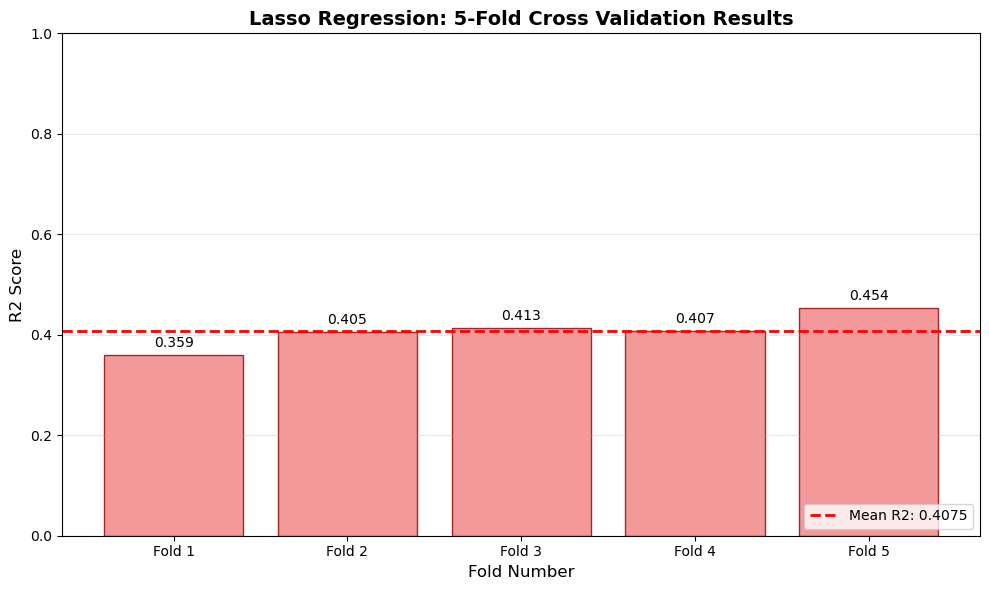

Difference (Single - CV): 0.0063


In [48]:
print("Lasso regression cross validation")
lassoCv = Lasso(alpha=1.0, random_state=42, max_iter=10000)
cvScoresR2LR = cross_val_score(lassoCv, X_final, y, cv=5, scoring='r2', n_jobs=-1)
cvScoresMseLR = cross_val_score(lassoCv, X_final, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

plt.figure(figsize=(10, 6))
xPos = np.arange(len(cvScoresR2LR)) + 1
bars = plt.bar(xPos, cvScoresR2LR, color='lightcoral', edgecolor='darkred', alpha=0.8)
plt.axhline(y=cvScoresR2LR.mean(), color='red', linestyle='--',linewidth=2,label=f'Mean R2: {cvScoresR2LR.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Lasso Regression: 5-Fold Cross Validation Results', fontsize=14, fontweight='bold')
plt.xticks(xPos, [f'Fold {i}' for i in xPos])
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars, cvScoresR2LR):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

singleLasso = Lasso(alpha=1.0, random_state=42, max_iter=10000)
singleLasso.fit(X_train, y_train)
singleTestPred = singleLasso.predict(X_test)
singleR2 = r2_score(y_test, singleTestPred)
singleRmse = np.sqrt(mean_squared_error(y_test, singleTestPred))
difference = singleR2 - cvScoresR2LR.mean()
print(f"Difference (Single - CV): {difference:.4f}")

## Comparing models

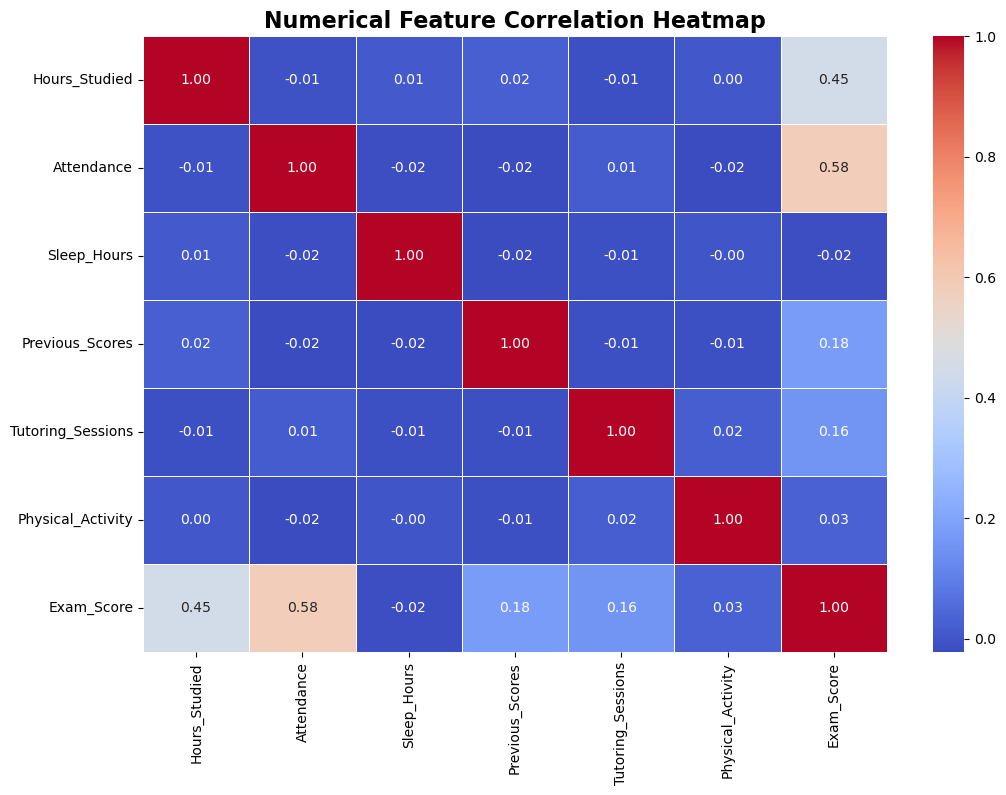

In [49]:
numeric_df = data.select_dtypes(include=['int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Numerical Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

In [50]:
summary = pd.DataFrame({
    "Model": ["Linear Regression", "KNN", "SVR (linear)", "Random Forest", "Decision Tree", "Lasso Regression"],
    "RMSE": [rmse_LR, rmse_KNN, rmse_best_svr, rmseBestRf, rmseBestDt, rmseBestLasso],
    "R²": [r2_LR, r2_KNN, r2_best_svr, r2BestRf, r2BestDt, r2BestLasso],
    "Train score": [train_LR, train_KNN, train_best_svr, trainBestRf, trainBestDt, trainBestLasso],
    "Test score": [test_LR, test_KNN, test_best_svr, testBestRf, testBestDt, testBestLasso],
    "CV Mean RMSE": [rmse_scores_LR.mean(), rmse_scores_KNN.mean(), svr_linear_scores_rmse.mean(), np.sqrt(-cvScoresMseRF.mean()), np.sqrt(-cvScoresMseDT.mean()), np.sqrt(-cvScoresMseLR.mean())],
    "CV Mean R²": [scores_LR.mean(), scores_KNN.mean(), svr_linear_scores_r2.mean(), cvScoresR2RF.mean(), cvScoresR2DT.mean(), cvScoresR2LR.mean()]
})

print(summary)

               Model      RMSE        R²  Train score  Test score  \
0  Linear Regression  1.966047  0.735231     0.725470    0.735231   
1                KNN  2.445675  0.590290     0.605450    0.590290   
2       SVR (linear)  1.961708  0.736398     0.722085    0.736398   
3      Random Forest  2.243979  0.655082     0.845205    0.655082   
4      Decision Tree  2.635192  0.524332     0.748057    0.524332   
5   Lasso Regression  1.966342  0.735152     0.725462    0.735152   

   CV Mean RMSE  CV Mean R²  
0      2.018764    0.726507  
1      2.527948    0.576170  
2      2.018423    0.726420  
3      2.340123    0.639057  
4      3.350598    0.256509  
5      2.994241    0.407527  


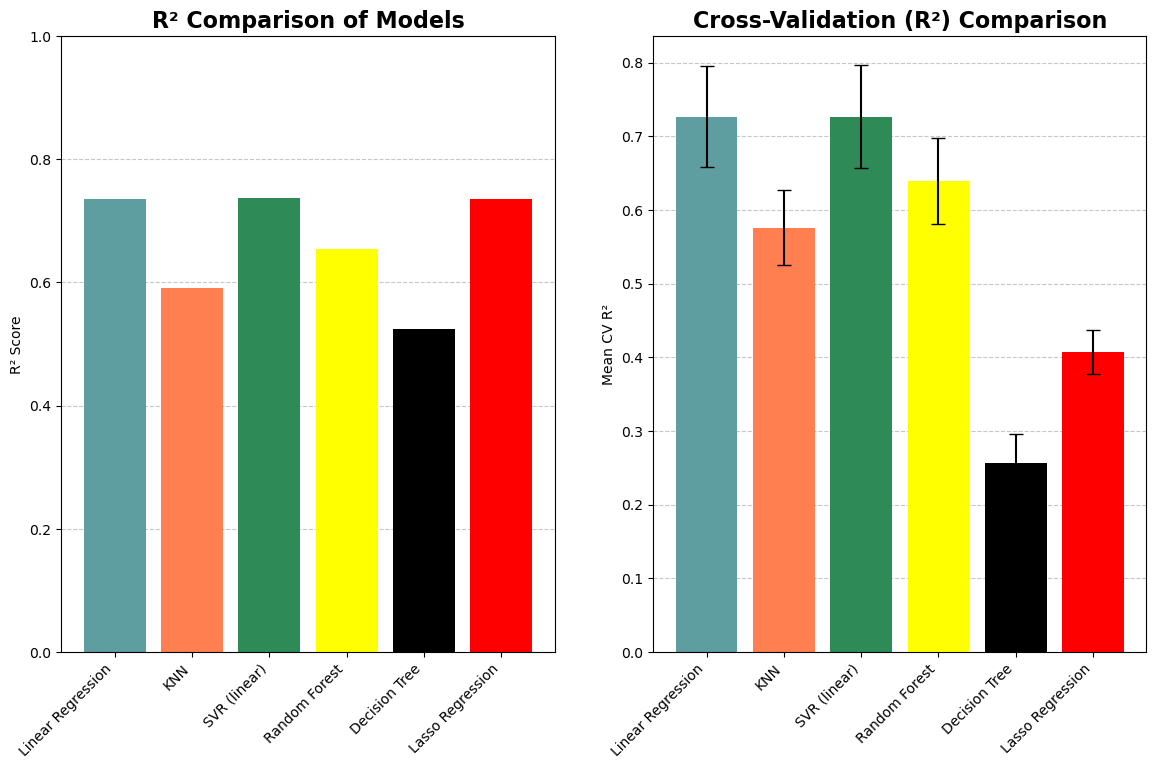

In [51]:
cv_means_r2 = [scores_LR.mean(), scores_KNN.mean(), svr_linear_scores_r2.mean(), cvScoresR2RF.mean(), cvScoresR2DT.mean(), cvScoresR2LR.mean()]
cv_stds_r2 = [scores_LR.std(), scores_KNN.std(), svr_linear_scores_r2.std(), cvScoresR2RF.std(), cvScoresR2DT.std(), cvScoresR2LR.std()]
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.bar(summary["Model"], summary["R²"], color=["cadetblue", "coral", "seagreen", "yellow", "black", "red"])
plt.title("R² Comparison of Models", fontsize=16, fontweight="bold")
plt.ylabel("R² Score")
plt.ylim(0, 1)
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
plt.bar(summary["Model"], cv_means_r2, yerr=cv_stds_r2, capsize=5, color=["cadetblue", "coral", "seagreen", "yellow", "black", "red"])
plt.title("Cross-Validation (R²) Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Mean CV R²")
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right')
plt.show()

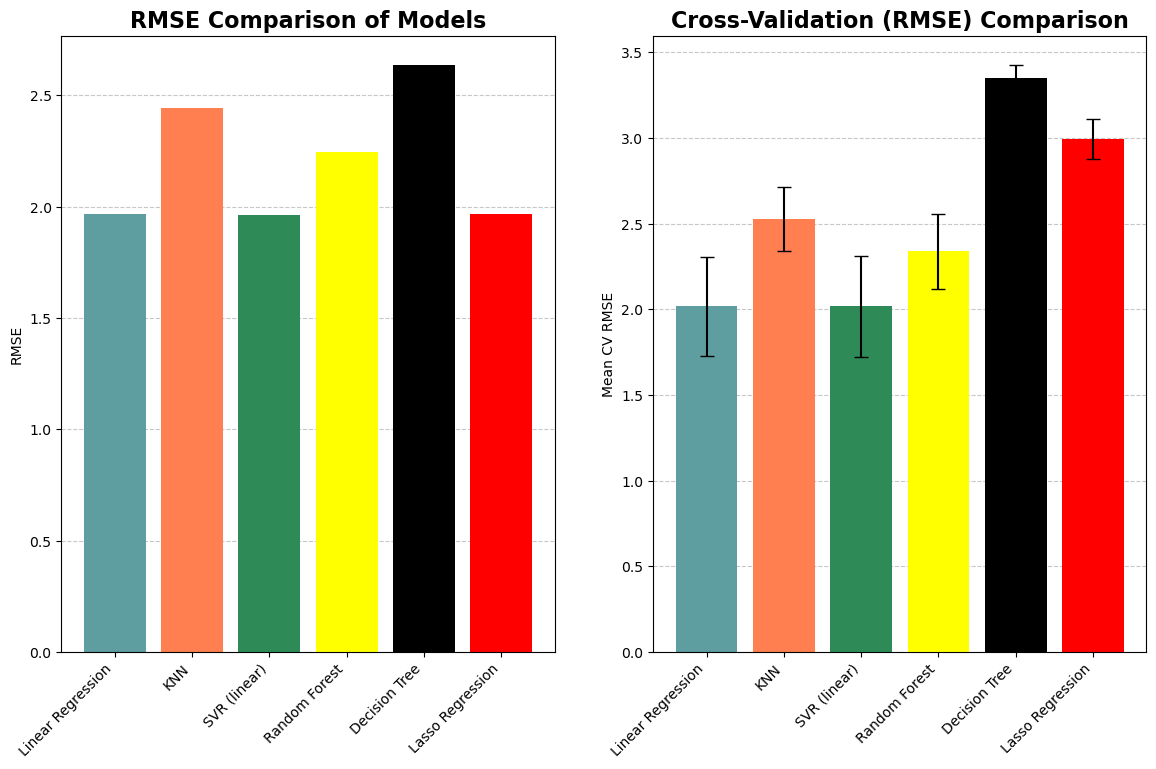

In [52]:
cv_means_rmse = [rmse_scores_LR.mean(), rmse_scores_KNN.mean(), svr_linear_scores_rmse.mean(), np.sqrt(-cvScoresMseRF.mean()), np.sqrt(-cvScoresMseDT.mean()), np.sqrt(-cvScoresMseLR.mean())]
cv_stds_rmse = [rmse_scores_LR.std(), rmse_scores_KNN.std(), svr_linear_scores_rmse.std(), np.sqrt(-cvScoresMseRF).std(), np.sqrt(-cvScoresMseDT).std(), np.sqrt(-cvScoresMseLR).std()]
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.bar(summary["Model"], summary["RMSE"], color=["cadetblue", "coral", "seagreen", "yellow", "black", "red"])
plt.title("RMSE Comparison of Models", fontsize=16, fontweight="bold")
plt.ylabel("RMSE")
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
plt.bar(summary["Model"], cv_means_rmse, yerr=cv_stds_rmse, capsize=5, color=["cadetblue", "coral", "seagreen", "yellow", "black", "red"])
plt.title("Cross-Validation (RMSE) Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Mean CV RMSE")
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right')
plt.show()

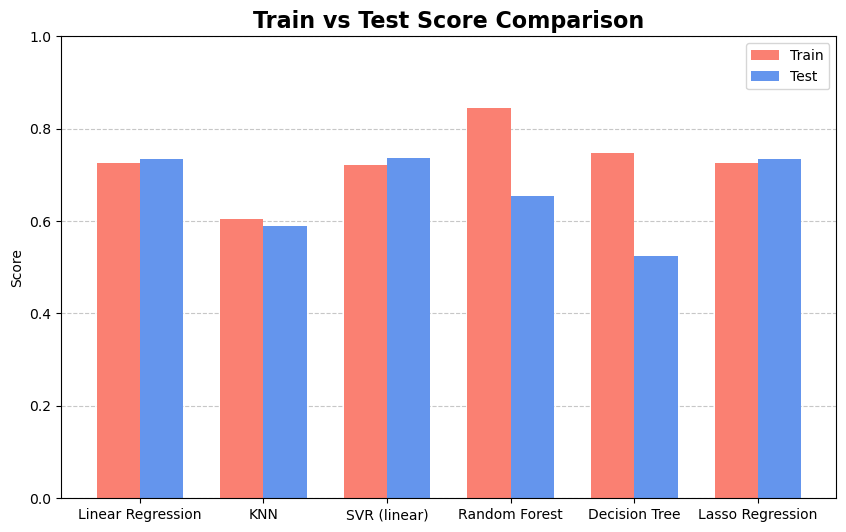

In [53]:
x = np.arange(len(summary["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, summary["Train score"], width, label="Train", color="salmon")
plt.bar(x + width/2, summary["Test score"], width, label="Test", color="cornflowerblue")

plt.xticks(x, summary["Model"])
plt.ylabel("Score")
plt.title("Train vs Test Score Comparison", fontsize=16, fontweight="bold")
plt.legend()
ax = plt.gca()
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.ylim(0, 1)
plt.show()